In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# We create a dictionary with some sample data
data = {'date': [
'2018-01-01', '2018-02-01',
'2018-03-01', '2018-04-01',
'2018-05-01', '2018-06-01',
'2018-01-01', '2018-02-01',
'2018-03-01', '2018-04-01',
'2018-05-01', '2018-06-01'],
'visitors': [35, 30, 82, 26, 83, 46, 40, 57, 95, 57, 87, 42]
}

In [3]:
df = pd.DataFrame(data, columns=['date', 'visitors'])

In [4]:
df.head()

,date,visitors
0,2018-01-01,35
1,2018-02-01,30
2,2018-03-01,82
3,2018-04-01,26
4,2018-05-01,83


Notice that when looking at the dataset, the rows have been given a number (starting with 0)

In [5]:
df.dtypes

date        object
visitors     int64
dtype: object

The *visitors* column is of interger type, but the date column is shown to be an object. We know that this is a date and it would be preferable to use a more relevant type.
We can change this column with to_datetime

In [6]:
# we can use to to_datetime method to convert Pandas columns into date object
df['date'] = pd.to_datetime(df['date'])

# We set index and sort the dataframe by that index
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

> The inplace property lets us make changes direclty to the dataframe. Otherwise, we would need to make copies of it to appy the changes.

In [7]:
df.head()

,visitors
date,
2018-01-01,35
2018-01-01,40
2018-02-01,30
2018-02-01,57
2018-03-01,82


In [8]:
# all data points
df['2018']

/tmp/ipykernel_62969/1179810648.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018']


,visitors
date,
2018-01-01,35
2018-01-01,40
2018-02-01,30
2018-02-01,57
2018-03-01,82
2018-03-01,95
2018-04-01,26
2018-04-01,57
2018-05-01,83


In [9]:
# Here we are filtering for the visitors in May
df['2018-05']

/tmp/ipykernel_62969/3123795720.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018-05']


,visitors
date,
2018-05-01,83
2018-05-01,87


Other slicing and dicing techniques used in collection objects are possible thanks to the use of the colon notation

In [10]:
df[datetime(2018, 3, 1):]

,visitors
date,
2018-03-01,82
2018-03-01,95
2018-04-01,26
2018-04-01,57
2018-05-01,83
2018-05-01,87
2018-06-01,46
2018-06-01,42


The *truncate* methods can help us keep all the data points before or after a given data. In this case, let us ask for the data up to March 2018.

In [11]:
# We can truncate the time series with the method
df.truncate(after=datetime(2018, 3, 1))

,visitors
date,
2018-01-01,35
2018-01-01,40
2018-02-01,30
2018-02-01,57
2018-03-01,82
2018-03-01,95


In [12]:
df.truncate(after=datetime(2018, 2, 1))

,visitors
date,
2018-01-01,35
2018-01-01,40
2018-02-01,30
2018-02-01,57


In [13]:
df.truncate(before=datetime(2018, 5, 1))

,visitors
date,
2018-05-01,83
2018-05-01,87
2018-06-01,46
2018-06-01,42


In [14]:
# We can calculate aggregations with the help of groupby. In this case we are interested in the count
df.groupby('date').count()

,visitors
date,
2018-01-01,2
2018-02-01,2
2018-03-01,2
2018-04-01,2
2018-05-01,2
2018-06-01,2


As expected, we have two entries for each date. We can also look at statistics such as the mean and the sum of entries.
In this case, we are going to use `resample` method for a series.  
In effect this enables us to change the time frequency in our dataset. Let us use the `M` *offset alias* to tell Pandas to create
monthly statistics.

In [15]:
df.resample('M').mean() # we calculate the mean

,visitors
date,
2018-01-31,37.5
2018-02-28,43.5
2018-03-31,88.5
2018-04-30,41.5
2018-05-31,85.0
2018-06-30,44.0


In [16]:
df.resample('M').sum() # we calculate the sum

,visitors
date,
2018-01-31,75
2018-02-28,87
2018-03-31,177
2018-04-30,83
2018-05-31,170
2018-06-30,88


| Alias | Description |
| ----- | ----------- |
| B | business day frequency |
| C | custom bunisness day frequency |
| D | calendar day frequency |
| W | weekly frequency |
| M | month-end frequency |
| Q | quarter-end frequency |
| H | hourly frequency |
| S | secondly frequency |
| N | nanoseconds
| BQ | business quarter-end frequency |
| QS | quarter start frequency |
| SM | semi-month-end frequency (15th and end of month) |
| BM | business month-end frequency |
| MS | month-start frequency |
| BH | business hour frequency |
| BQS | business quarter start frequency |
| SMS | semi-month-start frequency (1st and 15th) |
| CBM | custom business month-end frequency |
| BMS | business month start frequency |
| CBMS | custom business month-start frequency |
| A, Y | year-end frequency |
| L, ms | milliseconds |
| U, us | microseconds |
| BA, By | business year-end frequency |
| AS, YS | year-start frequency |
| T, min | minutely frequency |
| BAS, BYS | businness year-start frequency |


In [17]:
# Descriptive statistics for data entered manually. We are not including the count in this table
df.groupby('date').describe()

visitors                                                 
              count  mean        std   min    25%   50%    75%   max
date                                                                
2018-01-01      2.0  37.5   3.535534  35.0  36.25  37.5  38.75  40.0
2018-02-01      2.0  43.5  19.091883  30.0  36.75  43.5  50.25  57.0
2018-03-01      2.0  88.5   9.192388  82.0  85.25  88.5  91.75  95.0
2018-04-01      2.0  41.5  21.920310  26.0  33.75  41.5  49.25  57.0
2018-05-01      2.0  85.0   2.828427  83.0  84.00  85.0  86.00  87.0
2018-06-01      2.0  44.0   2.828427  42.0  43.00  44.0  45.00  46.0

In [18]:
# we can provide a data in plain natural language, and convert it to a date type
date = pd.to_datetime("14th of October, 2016")
date

Timestamp('2016-10-14 00:00:00')

| Directive | Meaning |
| --------- | ------- |
| %a | abbreviated weekday name |
| %A | full weekday name |
| %b | abbreviated month name |
| %B | full month name |
| %c | preferred date and time representation |
| %d | day of the month (1 to 31) |
| %D | same as %m/%d/%y
| %e | day of the month (1 to 31) |
| %m | month (1 to 12) |
| %M | minute |
| %S | second |
| %u | weekday as number (Mon = 1 to 7) |

In [19]:
print('%A => ' + date.strftime('%A'))
print('%a => ' +  date.strftime('%a'))
print('%b => ' +  date.strftime('%b'))
print('%B => ' +  date.strftime('%B'))
print('%c => ' +  date.strftime('%c'))
print('%d => ' +  date.strftime('%d'))
print('%D => ' +  date.strftime('%D'))
print('%e => ' +  date.strftime('%e'))
print('%m => ' +  date.strftime('%m'))
print('%M => ' +  date.strftime('%M'))
print('%S => ' +  date.strftime('%S'))
print('%U => ' +  date.strftime('%U'))
print('%u => ' +  date.strftime('%u'))

%A => Friday
%a => Fri
%b => Oct
%B => October
%c => Fri Oct 14 00:00:00 2016
%d => 14
%D => 10/14/16
%e => 14
%m => 10
%M => 00
%S => 00
%U => 41
%u => 5


In some case we may need to create time series data from scratch. In this section we are going to explore some of the ways  
which pandas enables us to crate and manipulate time series data on top the commands we have discussed up until this point.  

In [20]:
# we can determine a time series by specifying start and end times
pd.date_range('2018-05-30', '2018-06-02')

DatetimeIndex(['2018-05-30', '2018-05-31', '2018-06-01', '2018-06-02'], dtype='datetime64[ns]', freq='D')

Note that the output of the command above is an index covering the time range requested with a daily frequency  
as shown in the output with `freq="D"`  

An alternative to the above command is to provide a start date, but instead of giving an end date, we request a  
number of `periods` to cover with the time series.

In [21]:
pd.date_range('2023-02-28', periods=4)

DatetimeIndex(['2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03'], dtype='datetime64[ns]', freq='D')

In [22]:
# Here we provide a start time a number of periods and the frequency for those periods
# as you can see, all we had to do was specify the monthly frequency with freq="M"
pd.date_range('2023-02-28', periods=4, freq="M")

DatetimeIndex(['2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31'], dtype='datetime64[ns]', freq='M')

Let us construct a more complicated dataset: For a period of four days starting on June 4, 2018; we take  
reading for four features called, **A, B, C e D**. In this case we will generate the readings with a random  
number sampled from a standard normal distribution.

In [23]:
from numpy.random import randn
idx = pd.date_range('2018-06-04 00:00:00', periods=4)
cols = ['A', 'B', 'C', 'D']

We will now create data for four rows and four columns with help of randin

In [24]:
# randn(m, n) creates an anrray of m row and columns
data = randn(len(idx), len(cols))
data

array([[ 0.52199365, -0.06794737,  0.29436848,  1.48826394],
       [-0.57553074,  1.00215066, -0.13384976,  0.94363619],
       [ 0.34148036,  0.00643473,  0.31229367,  0.04041302],
       [ 0.39498088,  1.7800649 ,  1.31557911, -0.60401436]])

In [25]:
# Since we used random numbers to generate the dta, the numbers shown here will differ from
# those you may obtain on your computer

df = pd.DataFrame(data=data, index=idx, columns=cols)
df.index.name = 'date'
df

,A,B,C,D
date,,,,
2018-06-04,0.521994,-0.067947,0.294368,1.488264
2018-06-05,-0.575531,1.002151,-0.133850,0.943636
2018-06-06,0.341480,0.006435,0.312294,0.040413
2018-06-07,0.394981,1.780065,1.315579,-0.604014


A table like the one above is useful to summarise data and it is fit for `human consumption`. However, in many application  
it is much better to have a `long format`or `melted` dataset  

In ordet to achieve this, we nedd to repeat the dates and we also require a new column to hold the feature to which each  
rading corresponds. This can easily be done with **Pandas** in an single command.

In [26]:
# This is because we need to date to be part of the new formatted dataset
df.reset_index(inplace=True)
df

,date,A,B,C,D
0,2018-06-04,0.521994,-0.067947,0.294368,1.488264
1,2018-06-05,-0.575531,1.002151,-0.133850,0.943636
2,2018-06-06,0.341480,0.006435,0.312294,0.040413
3,2018-06-07,0.394981,1.780065,1.315579,-0.604014


In order to melt the dataframe, we will use the melt method that takes the following parameters:  
A column that will become the new identifier variable with `id_vars`, the columns to un-pivot are  
specified with `value_vars` and finally the names for the variables and value columns with `var_name` 
and `value_name`

In [27]:
# The original columns have become entries in the column called 'feature' and the values are in column 'reading'
melted = pd.melt(df, id_vars='date', var_name='feature', value_name='reading')
melted

,date,feature,reading
0,2018-06-04,A,0.521994
1,2018-06-05,A,-0.575531
2,2018-06-06,A,0.341480
3,2018-06-07,A,0.394981
4,2018-06-04,B,-0.067947
5,2018-06-05,B,1.002151
6,2018-06-06,B,0.006435
7,2018-06-07,B,1.780065
8,2018-06-04,C,0.294368
9,2018-06-05,C,-0.133850


In [28]:
melted.set_index('date', inplace=True)
melted.sort_index(inplace=True)
melted

,feature,reading
date,,
2018-06-04,A,0.521994
2018-06-04,B,-0.067947
2018-06-04,C,0.294368
2018-06-04,D,1.488264
2018-06-05,A,-0.575531
2018-06-05,B,1.002151
2018-06-05,C,-0.133850
2018-06-05,D,0.943636
2018-06-06,A,0.341480


In [29]:
import os
import numpy as np
import pandas as pd

In [30]:
base_files = os.path.join(os.getcwd(), '..', 'data', 'files')

In [31]:
# Make sure that you pass on the correct path for the file
appl = pd.read_csv(os.path.join(base_files, 'advanced-data-science-aapl.csv'), sep=',', encoding='utf-8')

In [32]:
appl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-25,143.910004,144.899994,143.869995,144.529999,142.279205,18871500
1,2017-04-26,144.470001,144.600006,143.380005,143.679993,141.442444,20041200
2,2017-04-27,143.919998,144.160004,143.309998,143.789993,141.550735,14246300
3,2017-04-28,144.089996,144.300003,143.270004,143.649994,141.412918,20860400
4,2017-05-01,145.100006,147.199997,144.960007,146.580002,144.297287,33602900


In [33]:
type(appl.Date)

pandas.core.series.Series

In [34]:
# We are using to_datetime to ensure that ates are appropriately typed
appl.Date = pd.to_datetime(appl.Date, format='%Y-%m-%d')
type(appl.Date)

pandas.core.series.Series

The dataset contains open, high, low and close prices for Apple Inc. stock between April 2017 and April 2018  
We are goint to concentrate on the `Close` column, but before we do that, we need to ensure tat the dataset is  
`indexed` by the time stamps provided by the `Date column`. We can easily do that with the `set_index method`

In [35]:
# We centre our attention on the use of the closing prices
appl.set_index('Date', inplace=True)
appl['Close'].head(3)

Date
2017-04-25    144.529999
2017-04-26    143.679993
2017-04-27    143.789993
Name: Close, dtype: float64

In [36]:
appl.sort_index(inplace=True)

$$
R_{t} = \frac{P_{t} - P_{t} -1}{P_{t} -1}
$$

* $ P_{t} $ is the price 
* *t*  is the time
* $ P_{t} - 1 $ is the price at the previous time period

In [37]:
# we are using pct_change to calculate the returns
appl['pct_change'] = appl.Close.pct_change()

In [38]:
# The percentage change from one day to the next is easily calculated
appl['pct_change'].tail(3)

Date
2018-04-23   -0.002896
2018-04-24   -0.013919
2018-04-25    0.004357
Name: pct_change, dtype: float64

$$ r_{t} = log(1 + R_{t}) = log(\frac{P_{t}}{P_{t} -1}) = log(P_{t}) - log(P_{t} - 1) * (1.2) $$

We need to calculate the logarithm of the price at each time *t* and then take the difference between time periods.  
We can certainly do this in Python, and Pandas gives us a helping hand with the diff().

In [39]:
# The diff method calculate the difference from one time period to the next
appl['log_ret'] = np.log(appl.Close).diff()

In [40]:
appl['log_ret'].tail(3)

Date
2018-04-23   -0.002901
2018-04-24   -0.014017
2018-04-25    0.004348
Name: log_ret, dtype: float64

This is the data that we show, we calculated that time series in the figure. It is fairly common to have  
financial data series like the one we have used above, where the frequency is given by the end of day prices.  
However, the frequency can be different for instance by the minimun upward or downward price movement in the price  
of security

In [41]:
parser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y %H:%M')

In [42]:
bitcoin = pd.read_csv(os.path.join(base_files, 'bitcoin_usd.csv'), parse_dates=['time_start'], date_parser=parser, index_col='time_start')

/tmp/ipykernel_62969/1511385639.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y %H:%M')


In [43]:
bitcoin.head()

,exchange,market,open,high,low,close,volume
time_start,,,,,,,
2016-03-31 00:00:00,BITF,BTC/USD,413.04,413.27,413.04,413.27,8.953746
2016-03-31 00:01:00,BITF,BTC/USD,413.27,413.27,413.27,413.27,0.000000
2016-03-31 00:02:00,BITF,BTC/USD,413.27,413.27,413.27,413.27,0.000000
2016-03-31 00:03:00,BITF,BTC/USD,413.27,413.27,413.27,413.27,4.726186
2016-03-31 00:04:00,BITF,BTC/USD,413.27,413.27,413.27,413.27,0.000000


Notice that we are specifiying what columns need to be parsed as dates with **parse_dates** and how  
the parsing should be performed with **date_parser**. We also load the dataset indicating which column  
is the index.

In [44]:
ticks = bitcoin[['close', 'volume']] # we are effectily creating a new dataframe called ticks

In [45]:
# The data is roughly on a minute-by-minute frequency. We can use Pandas
# to resample the data at desired intervals. For instance we can request for the data
# to be sampled every five minute and take the first value in the interval.

ticks.resample('5Min').first() # we can resample our data with the help of resample()

,close,volume
time_start,,
2016-03-31 00:00:00,413.27,8.953746
2016-03-31 00:05:00,413.26,0.035157
2016-03-31 00:10:00,413.51,43.640052
2016-03-31 00:15:00,414.98,0.038896
2016-03-31 00:20:00,414.98,0.241800
...,...,...
2016-04-03 23:35:00,420.60,0.000000
2016-04-03 23:40:00,NaN,NaN
2016-04-03 23:45:00,NaN,NaN


In [46]:
# we can also ask for the mean for example
ticks.resample('5Min').mean()


,close,volume
time_start,,
2016-03-31 00:00:00,413.270000,2.735987
2016-03-31 00:05:00,413.264000,2.211749
2016-03-31 00:10:00,414.660000,37.919166
2016-03-31 00:15:00,414.982000,5.574657
2016-03-31 00:20:00,414.986000,0.063756
...,...,...
2016-04-03 23:35:00,420.600000,0.000000
2016-04-03 23:40:00,NaN,NaN
2016-04-03 23:45:00,NaN,NaN


In [47]:
# In this way we could get the closing price for the day by resampling by day
# and requesting the last volume
ticks.resample('D').last()


,close,volume
time_start,,
2016-03-31,416.02,0.200000
2016-04-01,417.90,52.099684
2016-04-02,420.30,0.850000
2016-04-03,420.60,0.984358


In [48]:
# Now that we know how to resample the data, we can consider creating a new open
# high, low and close set of prices for the resampled data.
# 
# The ohlc() method lets us find the OHLC prices for our new sampled data
bars = ticks['close'].resample('5Min').ohlc()
bars

,open,high,low,close
time_start,,,,
2016-03-31 00:00:00,413.27,413.27,413.27,413.27
2016-03-31 00:05:00,413.26,413.28,413.25,413.28
2016-03-31 00:10:00,413.51,414.98,413.51,414.98
2016-03-31 00:15:00,414.98,414.99,414.98,414.98
2016-03-31 00:20:00,414.98,414.99,414.98,414.99
...,...,...,...,...
2016-04-03 23:35:00,420.60,420.60,420.60,420.60
2016-04-03 23:40:00,NaN,NaN,NaN,NaN
2016-04-03 23:45:00,NaN,NaN,NaN,NaN


In [49]:
# Pandas will take the first and last values in the interval to be open
# and close for the bar. Then it will take the max and min as the high and low
# respectively. In this way, we start filtering the data. For example, imagine we are
# interested in the price between 10 am and 4 pm each day
filtered = bars.between_time('10:00', '16:00')
filtered

,open,high,low,close
time_start,,,,
2016-03-31 10:00:00,416.00,416.00,415.98,415.98
2016-03-31 10:05:00,415.98,415.98,415.97,415.97
2016-03-31 10:10:00,415.97,415.97,415.96,415.96
2016-03-31 10:15:00,415.96,415.97,415.96,415.96
2016-03-31 10:20:00,415.96,415.98,415.96,415.96
...,...,...,...,...
2016-04-03 15:40:00,421.02,421.02,421.00,421.00
2016-04-03 15:45:00,421.01,421.01,421.01,421.01
2016-04-03 15:50:00,421.01,421.01,421.01,421.01


In [50]:
# We may be interested in looking at the price first thing in the morning
# in this case, we are using at_time method
bars.open.at_time('8:00')

time_start
2016-03-31 08:00:00    416.11
2016-04-01 08:00:00    416.02
2016-04-02 08:00:00    420.69
2016-04-03 08:00:00    418.78
Freq: 1440T, Name: open, dtype: float64

In [51]:
# Not only that, we can request the percentage change too by combining the methods we have
# already discussed
bars.open.at_time('8:00').pct_change()

time_start
2016-03-31 08:00:00         NaN
2016-04-01 08:00:00   -0.000216
2016-04-02 08:00:00    0.011225
2016-04-03 08:00:00   -0.004540
Freq: 1440T, Name: open, dtype: float64

In [52]:
# Please note that the first percentage change connot be calculated as we do not have
# a comparison data point from the previous interval. In this case, pandas indicates this by
# the use of NaN
bars.tail()

,open,high,low,close
time_start,,,,
2016-04-03 23:35:00,420.6,420.6,420.6,420.6
2016-04-03 23:40:00,NaN,NaN,NaN,NaN
2016-04-03 23:45:00,NaN,NaN,NaN,NaN
2016-04-03 23:50:00,420.6,420.6,420.6,420.6
2016-04-03 23:55:00,421.0,421.0,420.6,420.6


In [53]:
# We can fill in missing data with help of fillna, which taks a parameter called method.
# It can be either 'pad' or 'ffill' to propagate last valid observation forward or instead
# 'backfill' or 'bfill' to use the next valid observation to fill the gap.
#
# Here we have filled the missing data by bringing the last value forward and limiting the operation to one time period
bars.fillna(method='ffill', limit=1)

,open,high,low,close
time_start,,,,
2016-03-31 00:00:00,413.27,413.27,413.27,413.27
2016-03-31 00:05:00,413.26,413.28,413.25,413.28
2016-03-31 00:10:00,413.51,414.98,413.51,414.98
2016-03-31 00:15:00,414.98,414.99,414.98,414.98
2016-03-31 00:20:00,414.98,414.99,414.98,414.99
...,...,...,...,...
2016-04-03 23:35:00,420.60,420.60,420.60,420.60
2016-04-03 23:40:00,420.60,420.60,420.60,420.60
2016-04-03 23:45:00,NaN,NaN,NaN,NaN


In [54]:
filledbars = bars.fillna(method='ffill')

In [55]:
volume = ticks.volume.resample('5Min').sum()
vol = volume.fillna(0.)

/tmp/ipykernel_62969/1113957224.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  filledbars['2016-04-03'].between_time('9:00', '23:59').plot(color=['gray', 'gray', 'gray', 'k'], style=['-', '--', '-.', '-+'])


<AxesSubplot: >

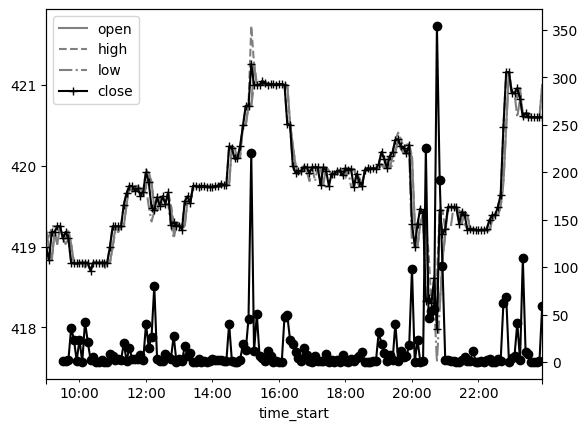

In [56]:
filledbars['2016-04-03'].between_time('9:00', '23:59').plot(color=['gray', 'gray', 'gray', 'k'], style=['-', '--', '-.', '-+'])
vol['2016-04-03'].between_time('9:30','23:59').plot(secondary_y=True, style='k-o')